# Assignment-3
Due date: March, 13th

In this assignment, you are asked to calculate sharpe ratio first with your own code and then employing `PyPortfolioOpt` library using Apple, Amazon, 3M, and Exxon companies. Please see [this website](https://pyportfolioopt.readthedocs.io/en/latest/) for more information about `PyPortfolioOpt`. The daily data covers the period of 2021-01-01 and 2022-01-01. To accomplish this task:

* Annualized the daily return and standard deviation for each respective stock.
* Draw efficient frontier.
* Assume risk free rate to be 0.01.
* Calculate the sharpe ratio and interpret which one is the best.

Hint: Please use `plot_efficient_frontier` function in `PyPortfolioOpt` to draw efficient frontier.

Again, please keep in mind that you are going to accomplish the task first with your own code and using `PyPortfolioOpt` library. Also note that you do not need to get exactly the same result.

In [81]:
# Install dependencies
!pip install yfinance
!pip install fredapi
!pip install PyPortfolioOpt
!pip install plotting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import objective_functions
from pypfopt import plotting

In [83]:
# Get closing stocks of Apple, Amazon, 3M, and Exxon
stocks = ['AAPL', 'AMZN', 'MMM', 'XOM']
start = datetime.datetime(2021,1,1)   # start date
end = datetime.datetime(2022,1,1)     # end date
port = yf.download(stocks, start=start, end=end, interval='1d')['Close']
port.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,MMM,XOM
Date,,,,
2021-01-04,129.410004,159.331497,171.869995,41.500000
2021-01-05,131.009995,160.925507,171.580002,43.500000
2021-01-06,126.599998,156.919006,174.190002,44.610001
2021-01-07,130.919998,158.108002,169.720001,44.959999
2021-01-08,132.050003,159.134995,166.619995,45.459999


In [84]:
# Calculate daily stock returns
returns = port.pct_change()
returns.dropna(inplace=True)
returns.head()

,AAPL,AMZN,MMM,XOM
Date,,,,
2021-01-05,0.012364,0.010004,-0.001687,0.048193
2021-01-06,-0.033662,-0.024897,0.015212,0.025517
2021-01-07,0.034123,0.007577,-0.025662,0.007846
2021-01-08,0.008631,0.006496,-0.018265,0.011121
2021-01-11,-0.023249,-0.021519,-0.008522,0.030356


In [85]:
# Calculate standard deviation of daily returns
sd = returns.std()
sd

AAPL    0.015761
AMZN    0.015145
MMM     0.011794
XOM     0.018796
dtype: float64

In [86]:
# Calculate the annualized average return and standard deviation
return_mean = returns.mean() * 252
std = returns.std() * np.sqrt(252)
print(f'Daily return mean: {return_mean} \n')
print(f'Daily return standard deviation: {std} \n')

# Calculate the Sharpe ratio
sharpe_ratio = (return_mean - 0.01) / std
print(sharpe_ratio, '\n')

# Max sharpe ratio
print('XOM has the maximum sharpe ratio', max(sharpe_ratio))

Daily return mean: AAPL    0.349005
AMZN    0.074378
MMM     0.050562
XOM     0.434391
dtype: float64 

Daily return standard deviation: AAPL    0.250198
AMZN    0.240413
MMM     0.187225
XOM     0.298374
dtype: float64 

AAPL    1.354950
AMZN    0.267780
MMM     0.216650
XOM     1.422348
dtype: float64 

XOM has the maximum sharpe ratio 1.4223477309031844


Sharpe ratio consider the total risk and fits well if portfolio is not well diversed 
The higher the Sharpe ratio is, the higher the return we gain per risk is. Here XOM is the highest stock with Sharpe ratio 1.422.

In [87]:
# Calculate sharpe ratio using pypfopt
mu = expected_returns.mean_historical_return(port)
S = risk_models.sample_cov(port)
ef = EfficientFrontier(mu, S)

weights = ef.max_sharpe(risk_free_rate=0.01)
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
print('Maximum sharpe ratio', max(cleaned_weights))

OrderedDict([('AAPL', 0.52354), ('AMZN', 0.0), ('MMM', 0.0), ('XOM', 0.47646)])
Maximum sharpe ratio XOM


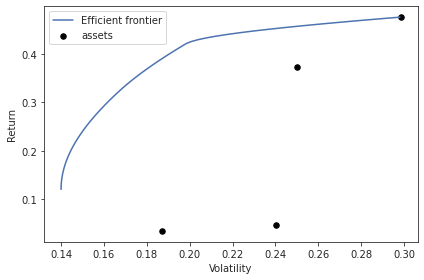

In [88]:
# Plot efficient frontier
ef2 = EfficientFrontier(mu, S)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef2, ax=ax, show_assets=True)
plt.show()